In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('/home/jaco/Documentos/Projetos/SantanderCustomer/train.csv')

In [3]:
# Showing the size of dataset 
data.shape

(200000, 202)

In [4]:
# Showing thhe first 5 rows
data.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
# Showing the class distribution
print('No Transaction', round(data['target'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Transaction', round(data['target'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Transaction 89.95 % of the dataset
Transaction 10.05 % of the dataset


Text(0.5, 1, 'Class Distributions \n (No Transaction - Transaction)')

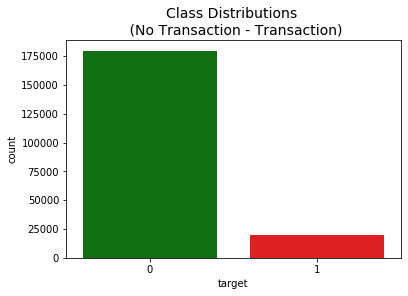

In [6]:
# Showing the class distribution
colors = ['#008000','#FF0000']
imbalance_class = sns.countplot('target', data=data, palette=colors)
fig = imbalance_class.get_figure()
fig.savefig('/home/jaco/Documentos/Projetos/CustomerTransactionPrediction/imbalance_class.png')
plt.title('Class Distributions \n (No Transaction - Transaction)', fontsize=14)

In [7]:
# Excluding the ID column
data = data.drop(columns=['ID_code'])

In [8]:
# Showing the first 5 rows
data.head(5)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
# Separating the label from the dataset
Target = data['target']

In [10]:
# Showing the first 3 rows
Target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [11]:
# Excluding the label column from dataset
X_train = data.drop(columns=['target'])

In [12]:
# Showing the first 3 rows
del data
X_train.head(3)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


In [13]:
# Balancing the dataset
sm = SMOTE(sampling_strategy='minority')
X_train_res, Target_res = sm.fit_resample(X_train, Target)

In [14]:
# Transformming the arrays into dataframes
X_train_res = pd.DataFrame(data=X_train_res)
Target_res = pd.DataFrame(data=Target_res, columns=['target'])

In [15]:
# Concatenating the two dataframes
dataset = pd.concat([X_train_res,Target_res], axis=1)

In [16]:
dataset.head(5)
del X_train
del Target
del X_train_res
del Target_res

Text(0.5, 1, 'Class Distributions \n (No Transaction - Transaction)')

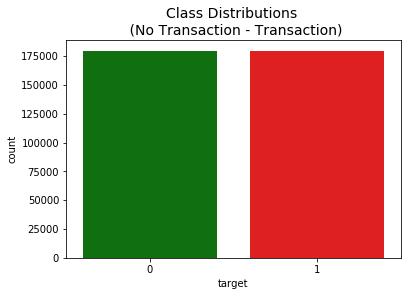

In [17]:
# Showing the class distribution
colors = ['#008000','#FF0000']
balance_class = sns.countplot('target', data=dataset, palette=colors)
fig1 = balance_class.get_figure()
fig1.savefig('/home/jaco/Documentos/Projetos/CustomerTransactionPrediction/balance_class.png')
plt.title('Class Distributions \n (No Transaction - Transaction)', fontsize=14)

In [18]:
# Showing the size of dataset
dataset.shape

(359804, 201)

In [19]:
# Saving the dataset on CSV format 
dataset.to_csv('~/SantanderCustomer/dataset.csv',encoding='utf-8', header=True)

In [20]:
# Making a correlation matrix
cor = dataset.corr()
cor

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,target
0,1.000000,0.007294,0.012609,0.009914,0.003145,0.009131,0.014356,0.002837,0.007573,-0.012474,...,0.006596,-0.006373,-0.006291,-0.006891,0.007236,0.008946,-0.004483,-0.005329,0.011341,0.088002
1,0.007294,1.000000,0.014241,0.003506,0.001153,0.004643,0.009718,0.012125,0.002893,-0.004313,...,0.010612,-0.001269,0.000748,-0.009019,0.002632,0.000601,-0.010123,-0.019020,0.003997,0.085971
2,0.012609,0.014241,1.000000,0.003061,0.000127,0.006867,0.007388,0.006005,0.004764,-0.007371,...,0.005248,-0.016760,0.000740,-0.005347,0.001402,0.000617,-0.005893,-0.002841,0.009926,0.098081
3,0.009914,0.003506,0.003061,1.000000,0.000755,0.004492,0.000974,0.002860,0.004406,-0.003300,...,0.008738,-0.004672,0.000099,-0.002994,0.003088,0.000275,0.000246,-0.005635,-0.000883,0.020075
4,0.003145,0.001153,0.000127,0.000755,1.000000,-0.000855,0.005210,0.003657,0.000052,-0.004576,...,0.014432,0.004300,-0.001485,-0.001793,-0.002374,-0.000993,0.000680,-0.007754,-0.000665,0.018843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.008946,0.000601,0.000617,0.000275,-0.000993,0.007278,0.011178,-0.000763,0.001993,0.001986,...,0.002297,-0.000569,-0.001789,-0.010257,-0.002045,1.000000,-0.008806,-0.002665,0.002733,0.042663
197,-0.004483,-0.010123,-0.005893,0.000246,0.000680,-0.003657,-0.006317,0.007004,-0.008042,0.005385,...,-0.002829,0.002315,0.010732,0.007441,-0.001224,-0.008806,1.000000,0.007715,0.004176,-0.061503
198,-0.005329,-0.019020,-0.002841,-0.005635,-0.007754,-0.011357,-0.009002,-0.000826,0.008783,0.005505,...,-0.004852,0.013491,0.001755,0.003853,-0.003401,-0.002665,0.007715,1.000000,-0.005307,-0.091129
199,0.011341,0.003997,0.009926,-0.000883,-0.000665,-0.003044,0.012300,-0.000939,0.000246,-0.006498,...,0.013938,-0.006368,-0.006365,-0.006276,0.009010,0.002733,0.004176,-0.005307,1.000000,0.053859


In [21]:
# Selecting features over 0.08
cor_target = abs(cor['target'])
relevant_features = cor_target[cor_target>0.08]
relevant_features

0         0.088002
1         0.085971
2         0.098081
6         0.119389
12        0.122397
13        0.091977
21        0.100342
22        0.101707
26        0.103801
33        0.080916
34        0.088756
40        0.084352
53        0.113282
76        0.105469
78        0.082515
80        0.086096
81        0.138575
92        0.082443
94        0.082578
99        0.104084
108       0.082233
109       0.087859
110       0.108067
133       0.097054
139       0.127998
146       0.114305
148       0.091764
149       0.081062
165       0.102344
166       0.098737
169       0.086078
170       0.081415
174       0.103011
179       0.084917
184       0.084350
190       0.095426
191       0.083201
198       0.091129
target    1.000000
Name: target, dtype: float64

In [22]:
# Making a dataset with the features selected above
red_dataset = dataset[relevant_features.index]

In [23]:
# Saving the new dataset on CSV format
red_dataset.to_csv('~/SantanderCustomer/red_dataset.csv',encoding='utf-8', header=True)

In [24]:
del dataset
del cor
del cor_target
del relevant_features

In [25]:
# Assigning dataset values to a variable
red_dataset = red_dataset.values

In [26]:
# Separating features from label
target = red_dataset[:,-1]
features = red_dataset[:,:-1]
del red_dataset

In [27]:
# Splitting the dataset in train and test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [28]:
# Saving the train and test files
np.save('~/SantanderCustomer/x_train', x_train)
np.save('~/SantanderCustomer/x_test', x_test)
np.save('~/SantanderCustomer/y_train', y_train)
np.save('~/SantanderCustomer/y_test', y_test)

In [36]:
# Normalizing the train and test files
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
x_train_norm = MinMax.fit_transform(x_train)
x_test_norm = MinMax.fit_transform(x_test)

In [38]:
# Saving the new train and test files
np.save('~/SantanderCustomer/x_train_norm', x_train_norm)
np.save('~/SantanderCustomer/x_test_norm', x_test_norm)

In [39]:
# Standarding the train and test files
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()
x_train_stand = Standard.fit_transform(x_train)
x_test_stand = Standard.fit_transform(x_test)

In [40]:
# Saving the new train and test files
np.save('~/SantanderCustomer/x_train_stand', x_train_stand)
np.save('~/SantanderCustomer/x_test_stand', x_test_stand)